# Align multiple dataset to reconstrcut 3D structure
In this case we use `SLAT` to rebuild 3D structure of mouse embryo

In [1]:
import os
from pathlib import Path
from operator import itemgetter

import scanpy as sc
import numpy as np
import pandas as pd
import torch
from anndata import AnnData
from joblib import Parallel, delayed
from harmony import harmonize

import scSLAT
from scSLAT.model import run_SLAT_multi, load_anndatas, Cal_Spatial_Net, run_SLAT, spatial_match, scanpy_workflow
from scSLAT.viz import match_3D_multi, hist, build_3D
from scSLAT.metrics import region_statistics

/rd2/user/xiacr/SLAT/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sc.set_figure_params(dpi=150, dpi_save=150)

In [3]:
file_path = './'  # Replace it with your file path
file_list = [file for file in Path(file_path).iterdir()]
file_list

[PosixPath('times_series.ipynb'),
 PosixPath('.ipynb_checkpoints'),
 PosixPath('multi_datasets.ipynb'),
 PosixPath('basic_usage.ipynb'),
 PosixPath('pre_match.ipynb')]

In [4]:
adata1,adata2,adata3,adata4 = Parallel(n_jobs=len(file_list)+1)\
    (delayed(sc.read_h5ad)(file) for file in itemgetter(*[3,1,0,2])(file_list))

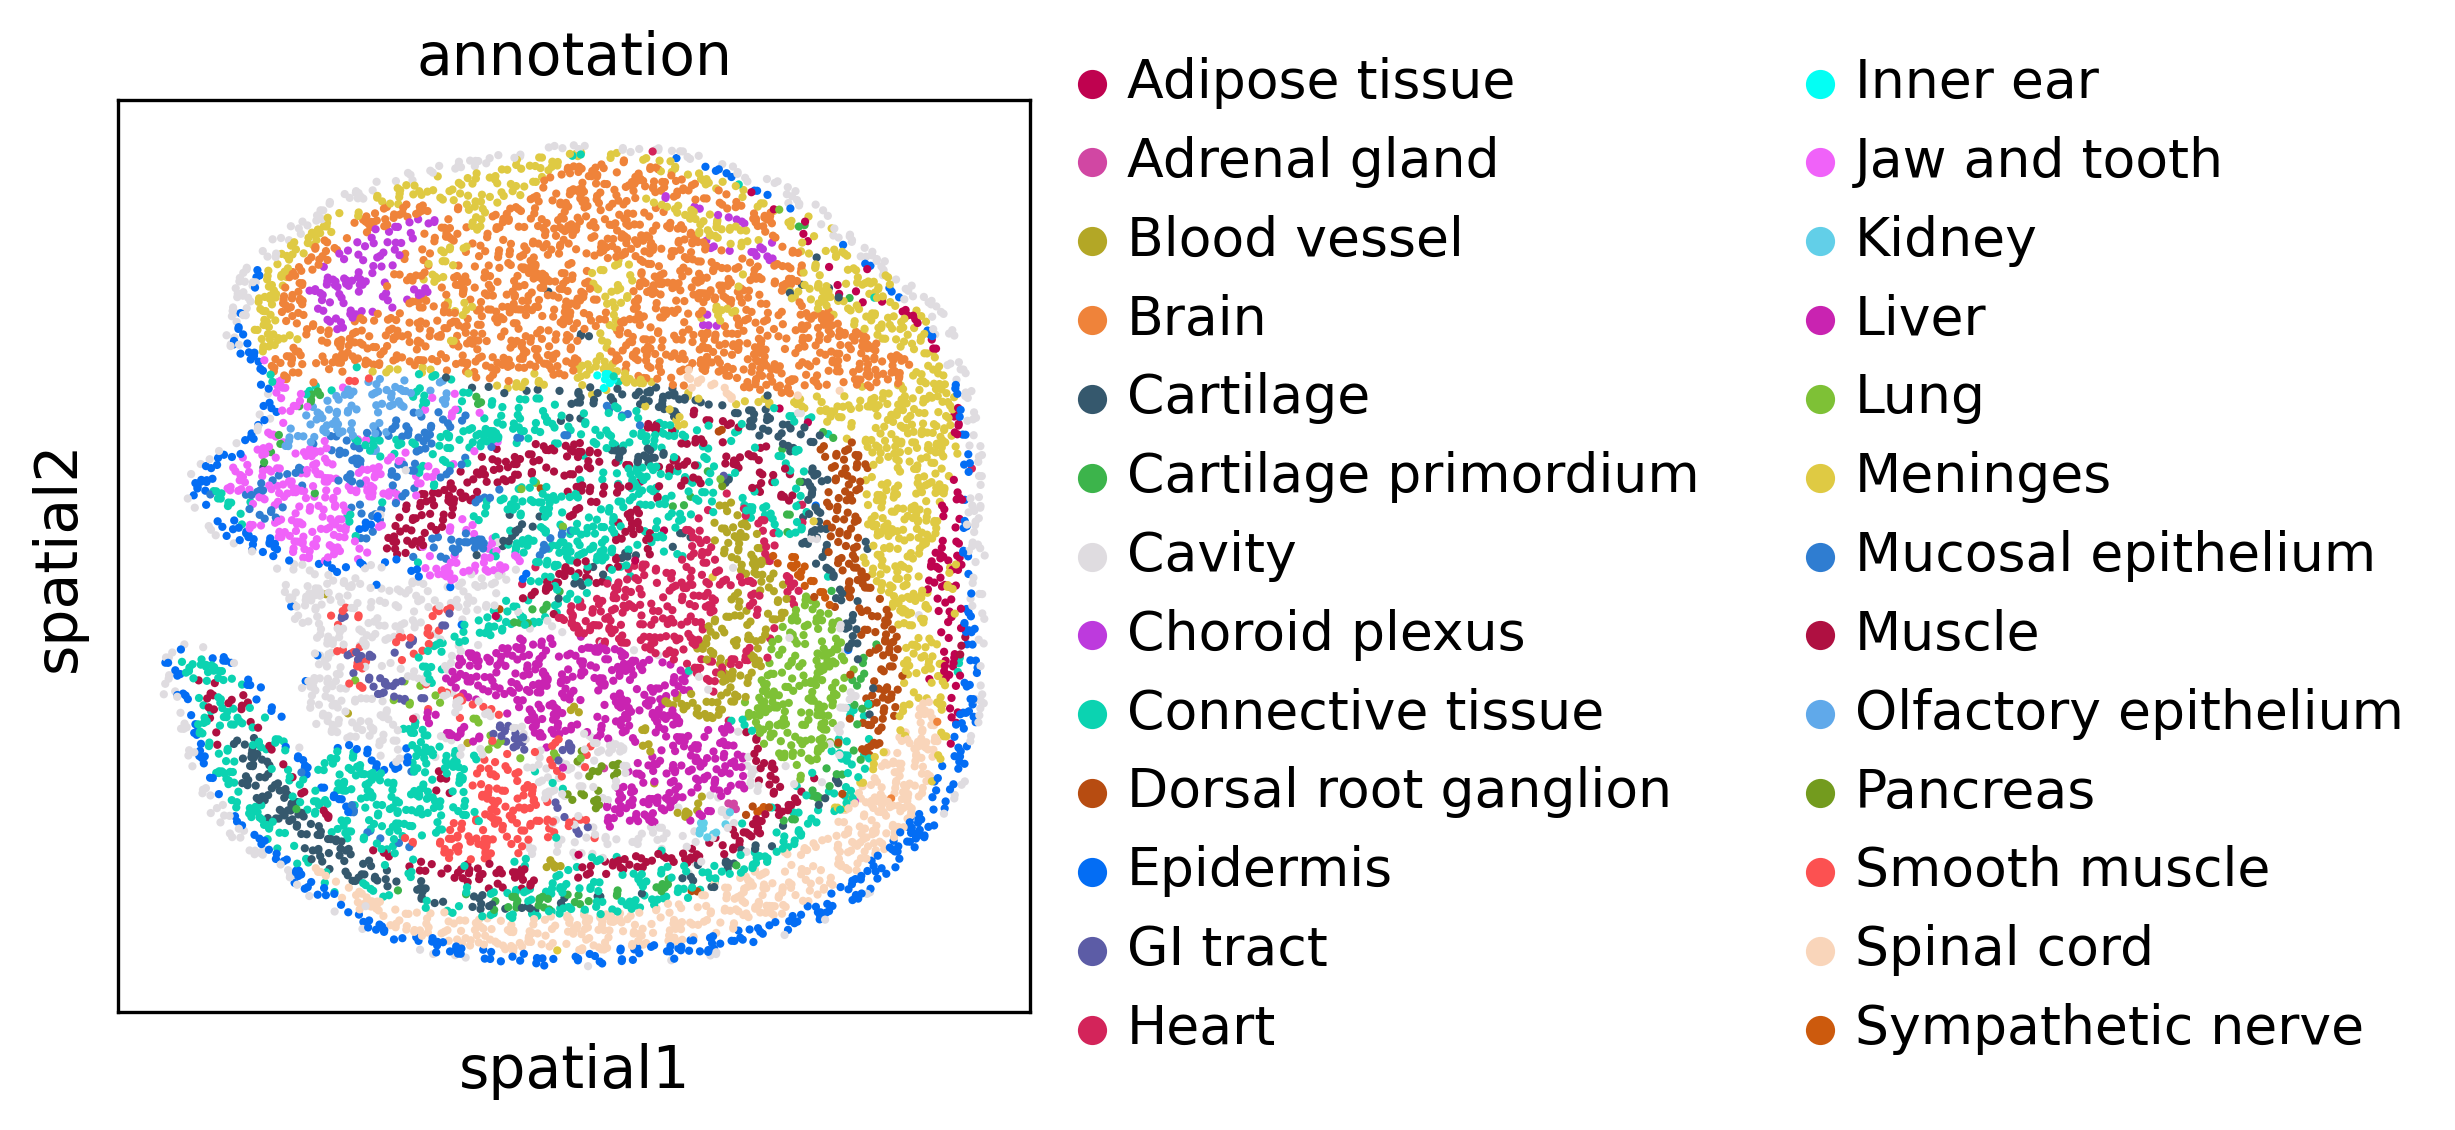

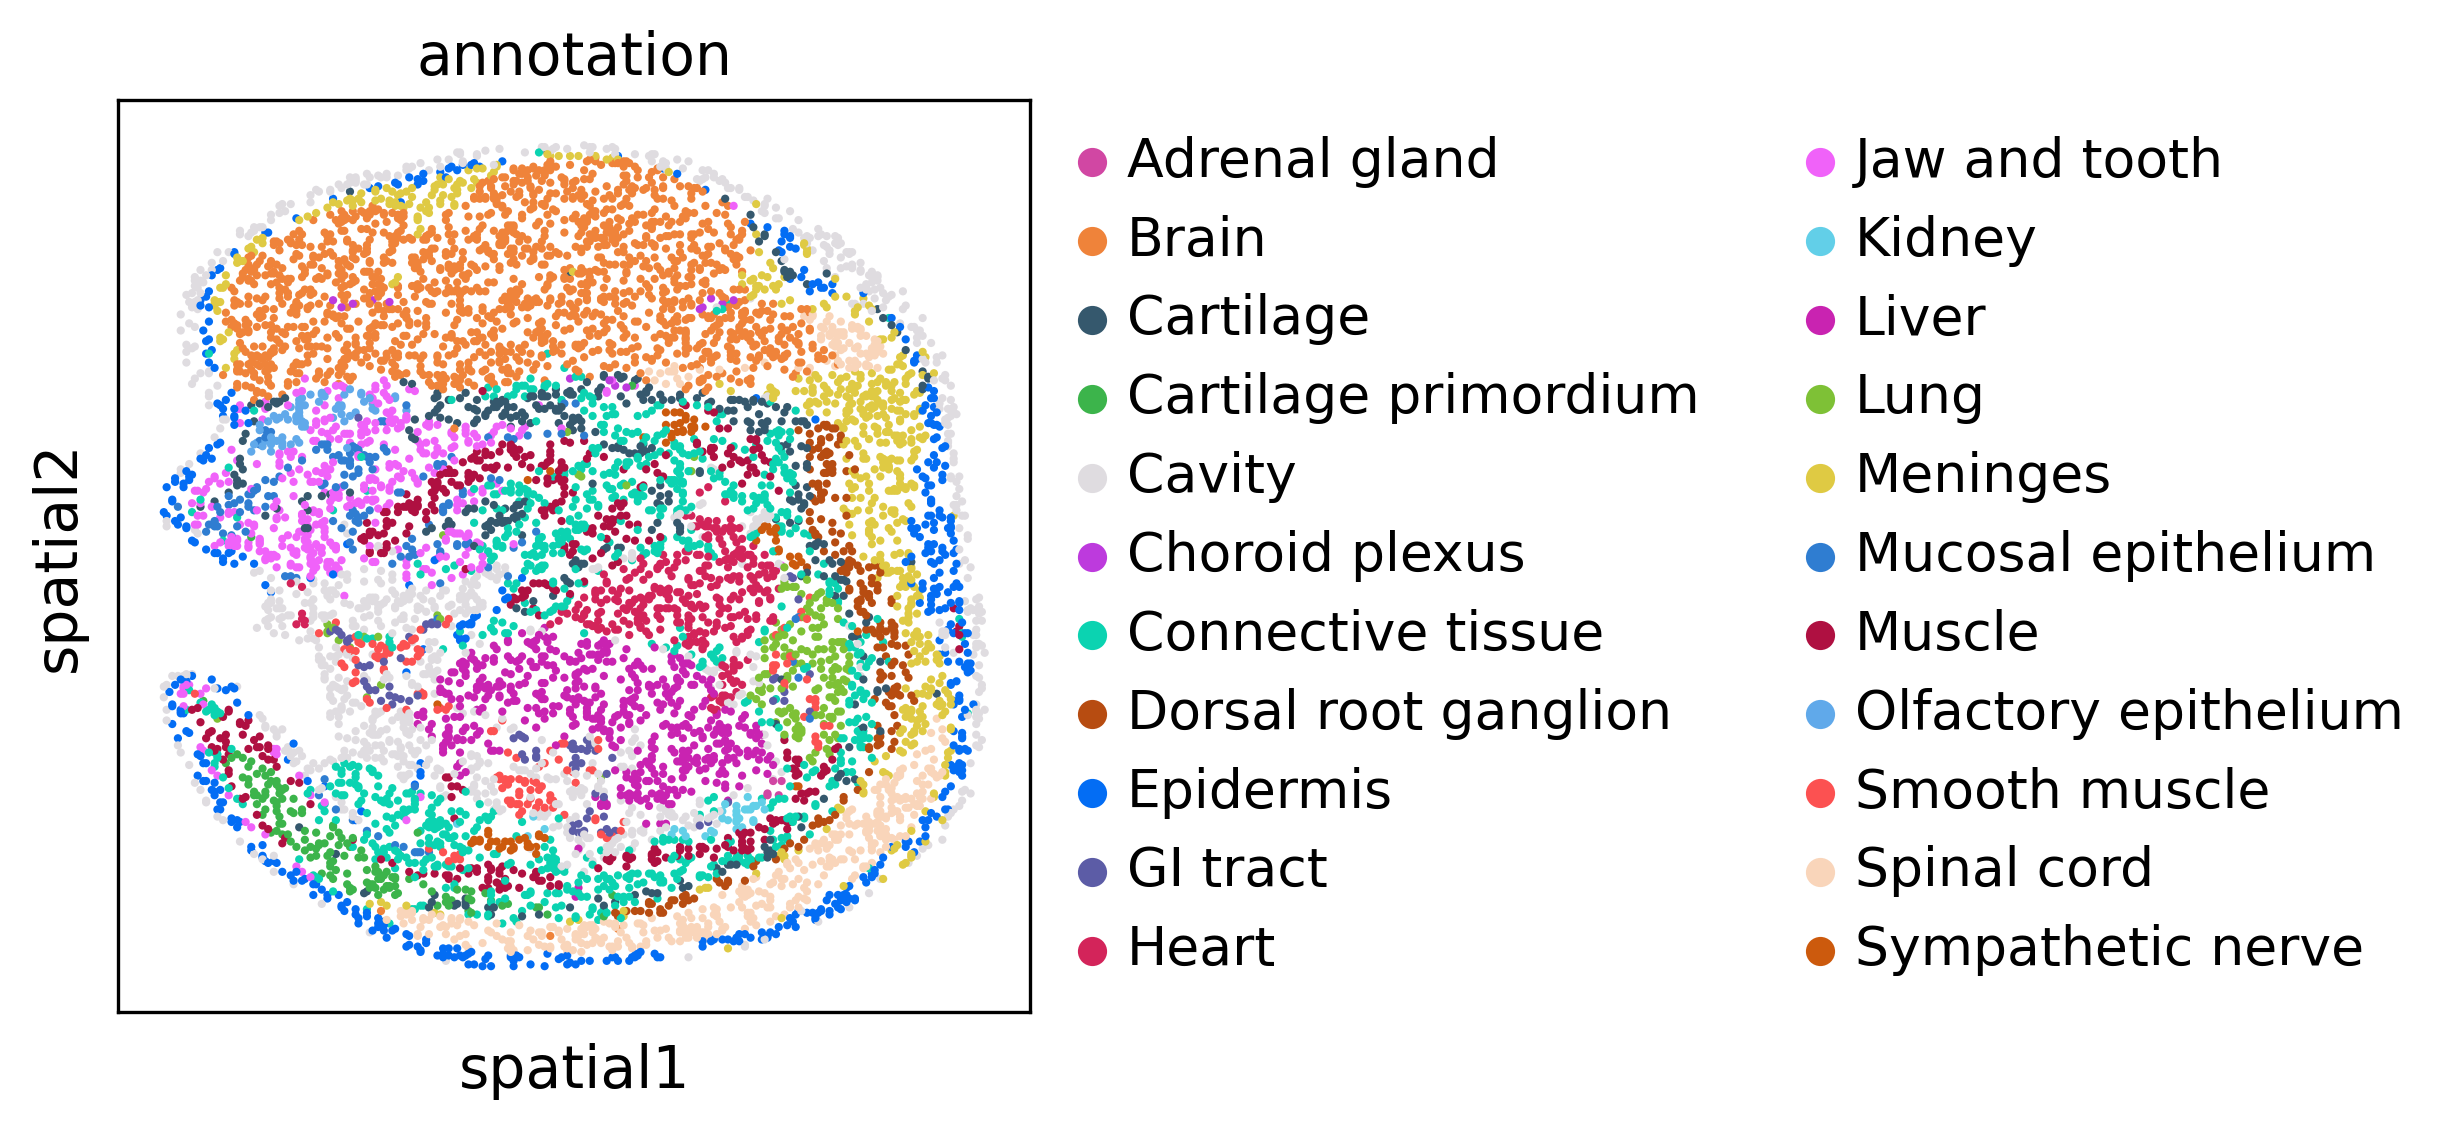

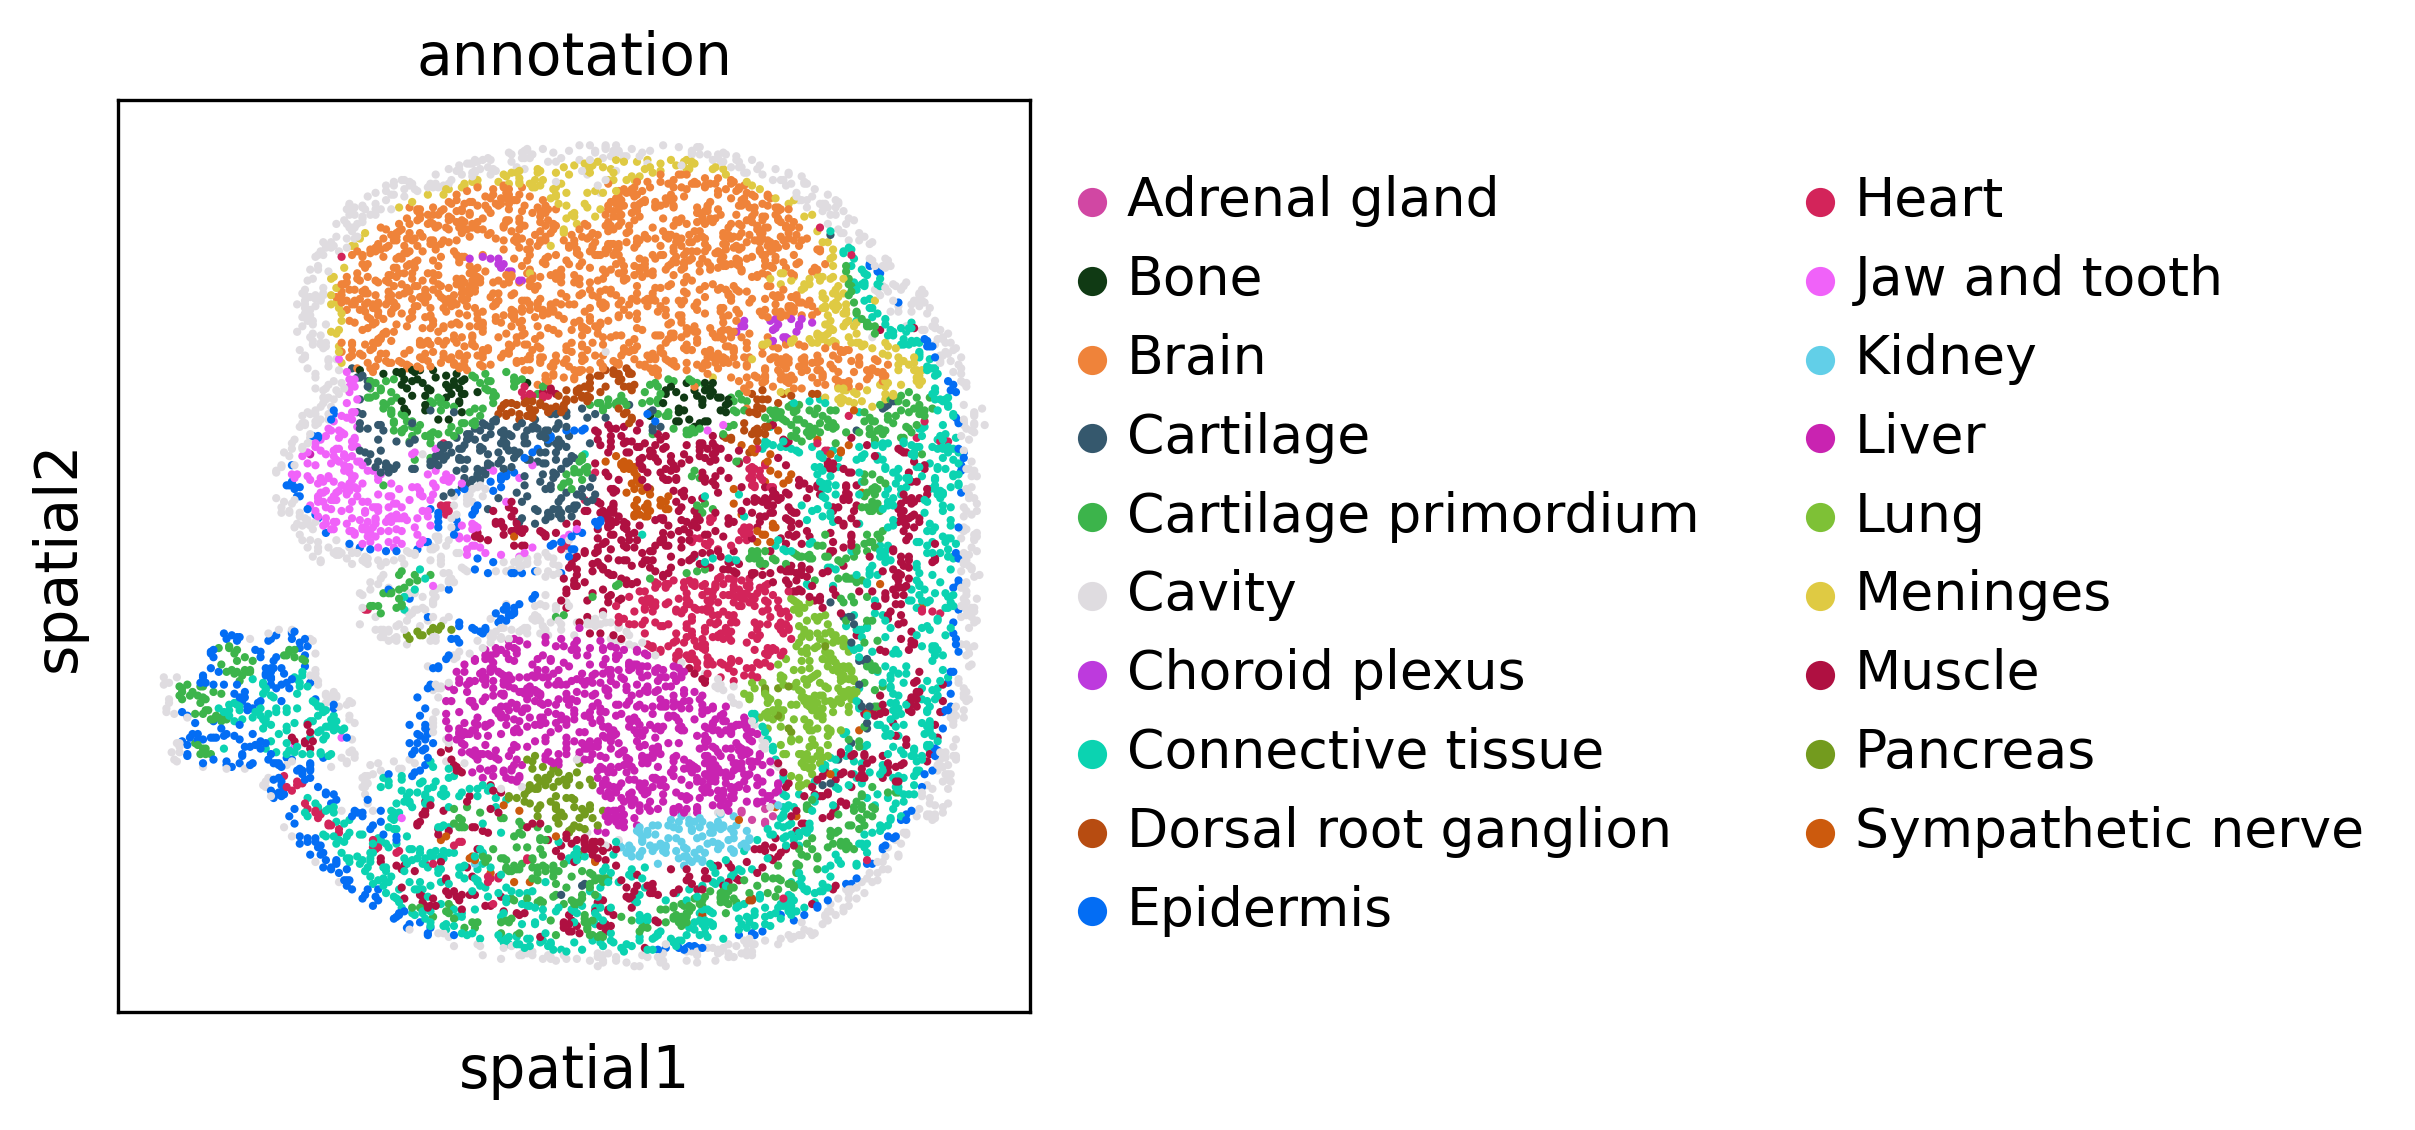

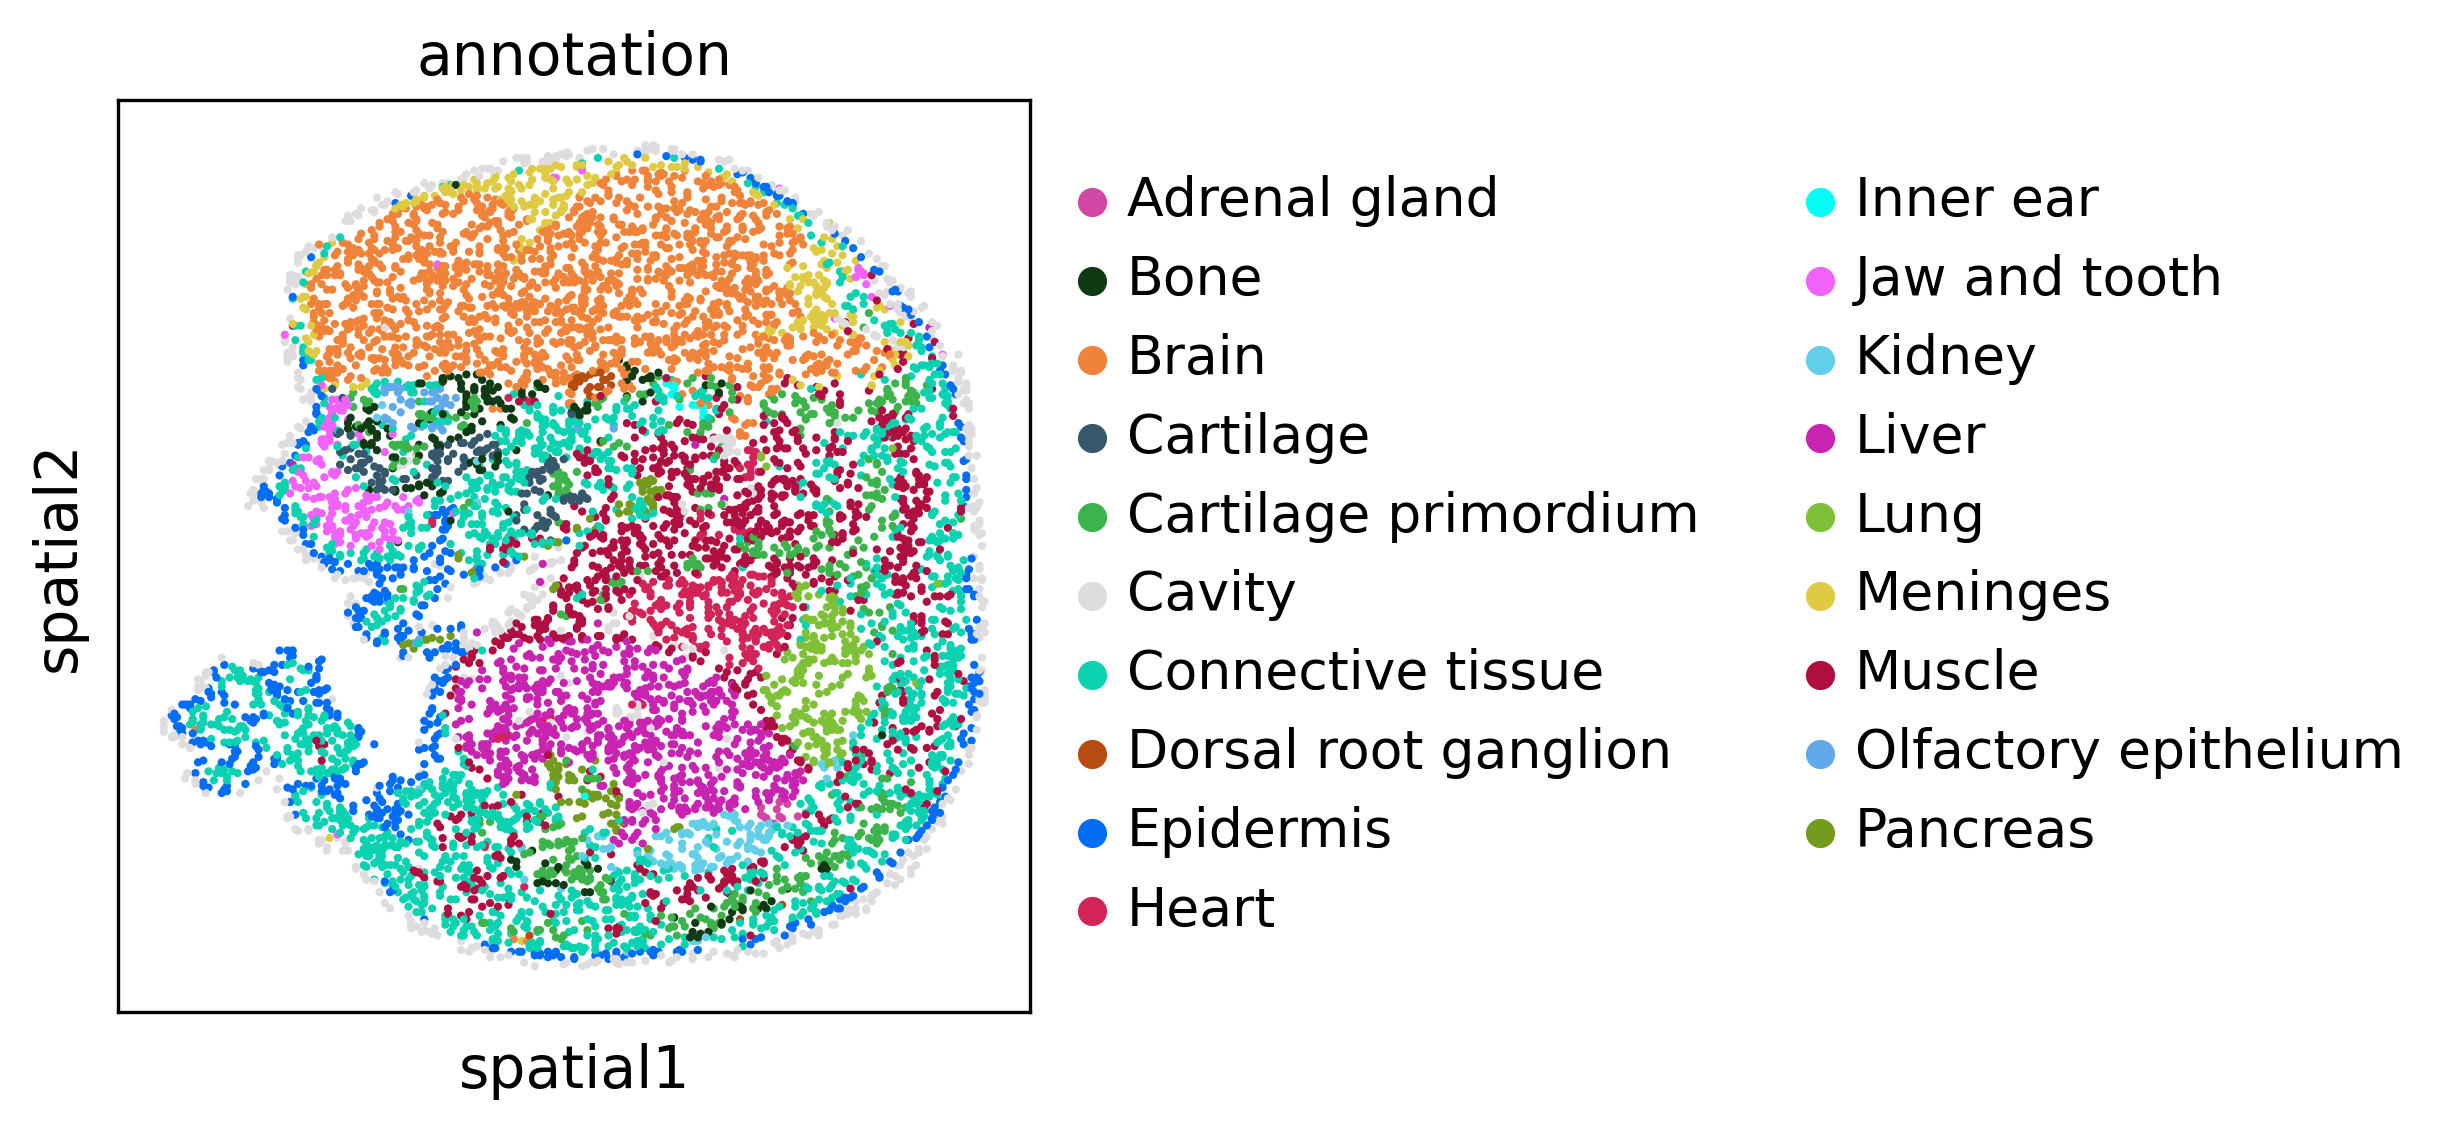

In [41]:
sc.pl.spatial(adata1,spot_size=0.01,color='annotation')
sc.pl.spatial(adata2,spot_size=0.01,color='annotation')
sc.pl.spatial(adata3,spot_size=0.01,color='annotation')
sc.pl.spatial(adata4,spot_size=0.01,color='annotation')

# run SLAT on multi datasets

In [6]:
matching_list, zip_res = run_SLAT_multi([adata1,adata2,adata3,adata4])

Calculating spatial neighbour graph ...
The graph contains 399950 edges, 7999 cells.
50.0000 neighbors per cell on average.
Calculating spatial neighbour graph ...
The graph contains 399900 edges, 7998 cells.
50.0000 neighbors per cell on average.
Calculating spatial neighbour graph ...
The graph contains 399850 edges, 7997 cells.
50.0000 neighbors per cell on average.
Calculating spatial neighbour graph ...
The graph contains 400000 edges, 8000 cells.
50.0000 neighbors per cell on average.
Parallel mapping dataset:1 --- dataset:2
Use harmony feature to format graph
	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
	Completed 8 / 10 iteration(s).
	Completed 9 / 10 iteration(s).
	Completed 10 / 10 iteration(s).
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
----

/rd2/user/xiacr/spatialGLUE/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/rd2/user/xiacr/spatialGLUE/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/rd2/user/xiacr/spatialGLUE/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  view_to_actual(adata)


Parallel mapping dataset:0 --- dataset:1
Use harmony feature to format graph
	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
Reach convergence after 6 iteration(s).
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
---------- epochs: 7 ----------
Total Time 1.13


/rd2/user/xiacr/spatialGLUE/conda/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/rd2/user/xiacr/spatialGLUE/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/rd2/user/xiacr/spatialGLUE/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  view_to_actual(adata)


In [31]:
index_list = [i[0] for i in zip_res] 
index_list[2].shape

(7997, 20)

Mapping 0th layer 
Mapping 1th layer 
Mapping 2th layer 


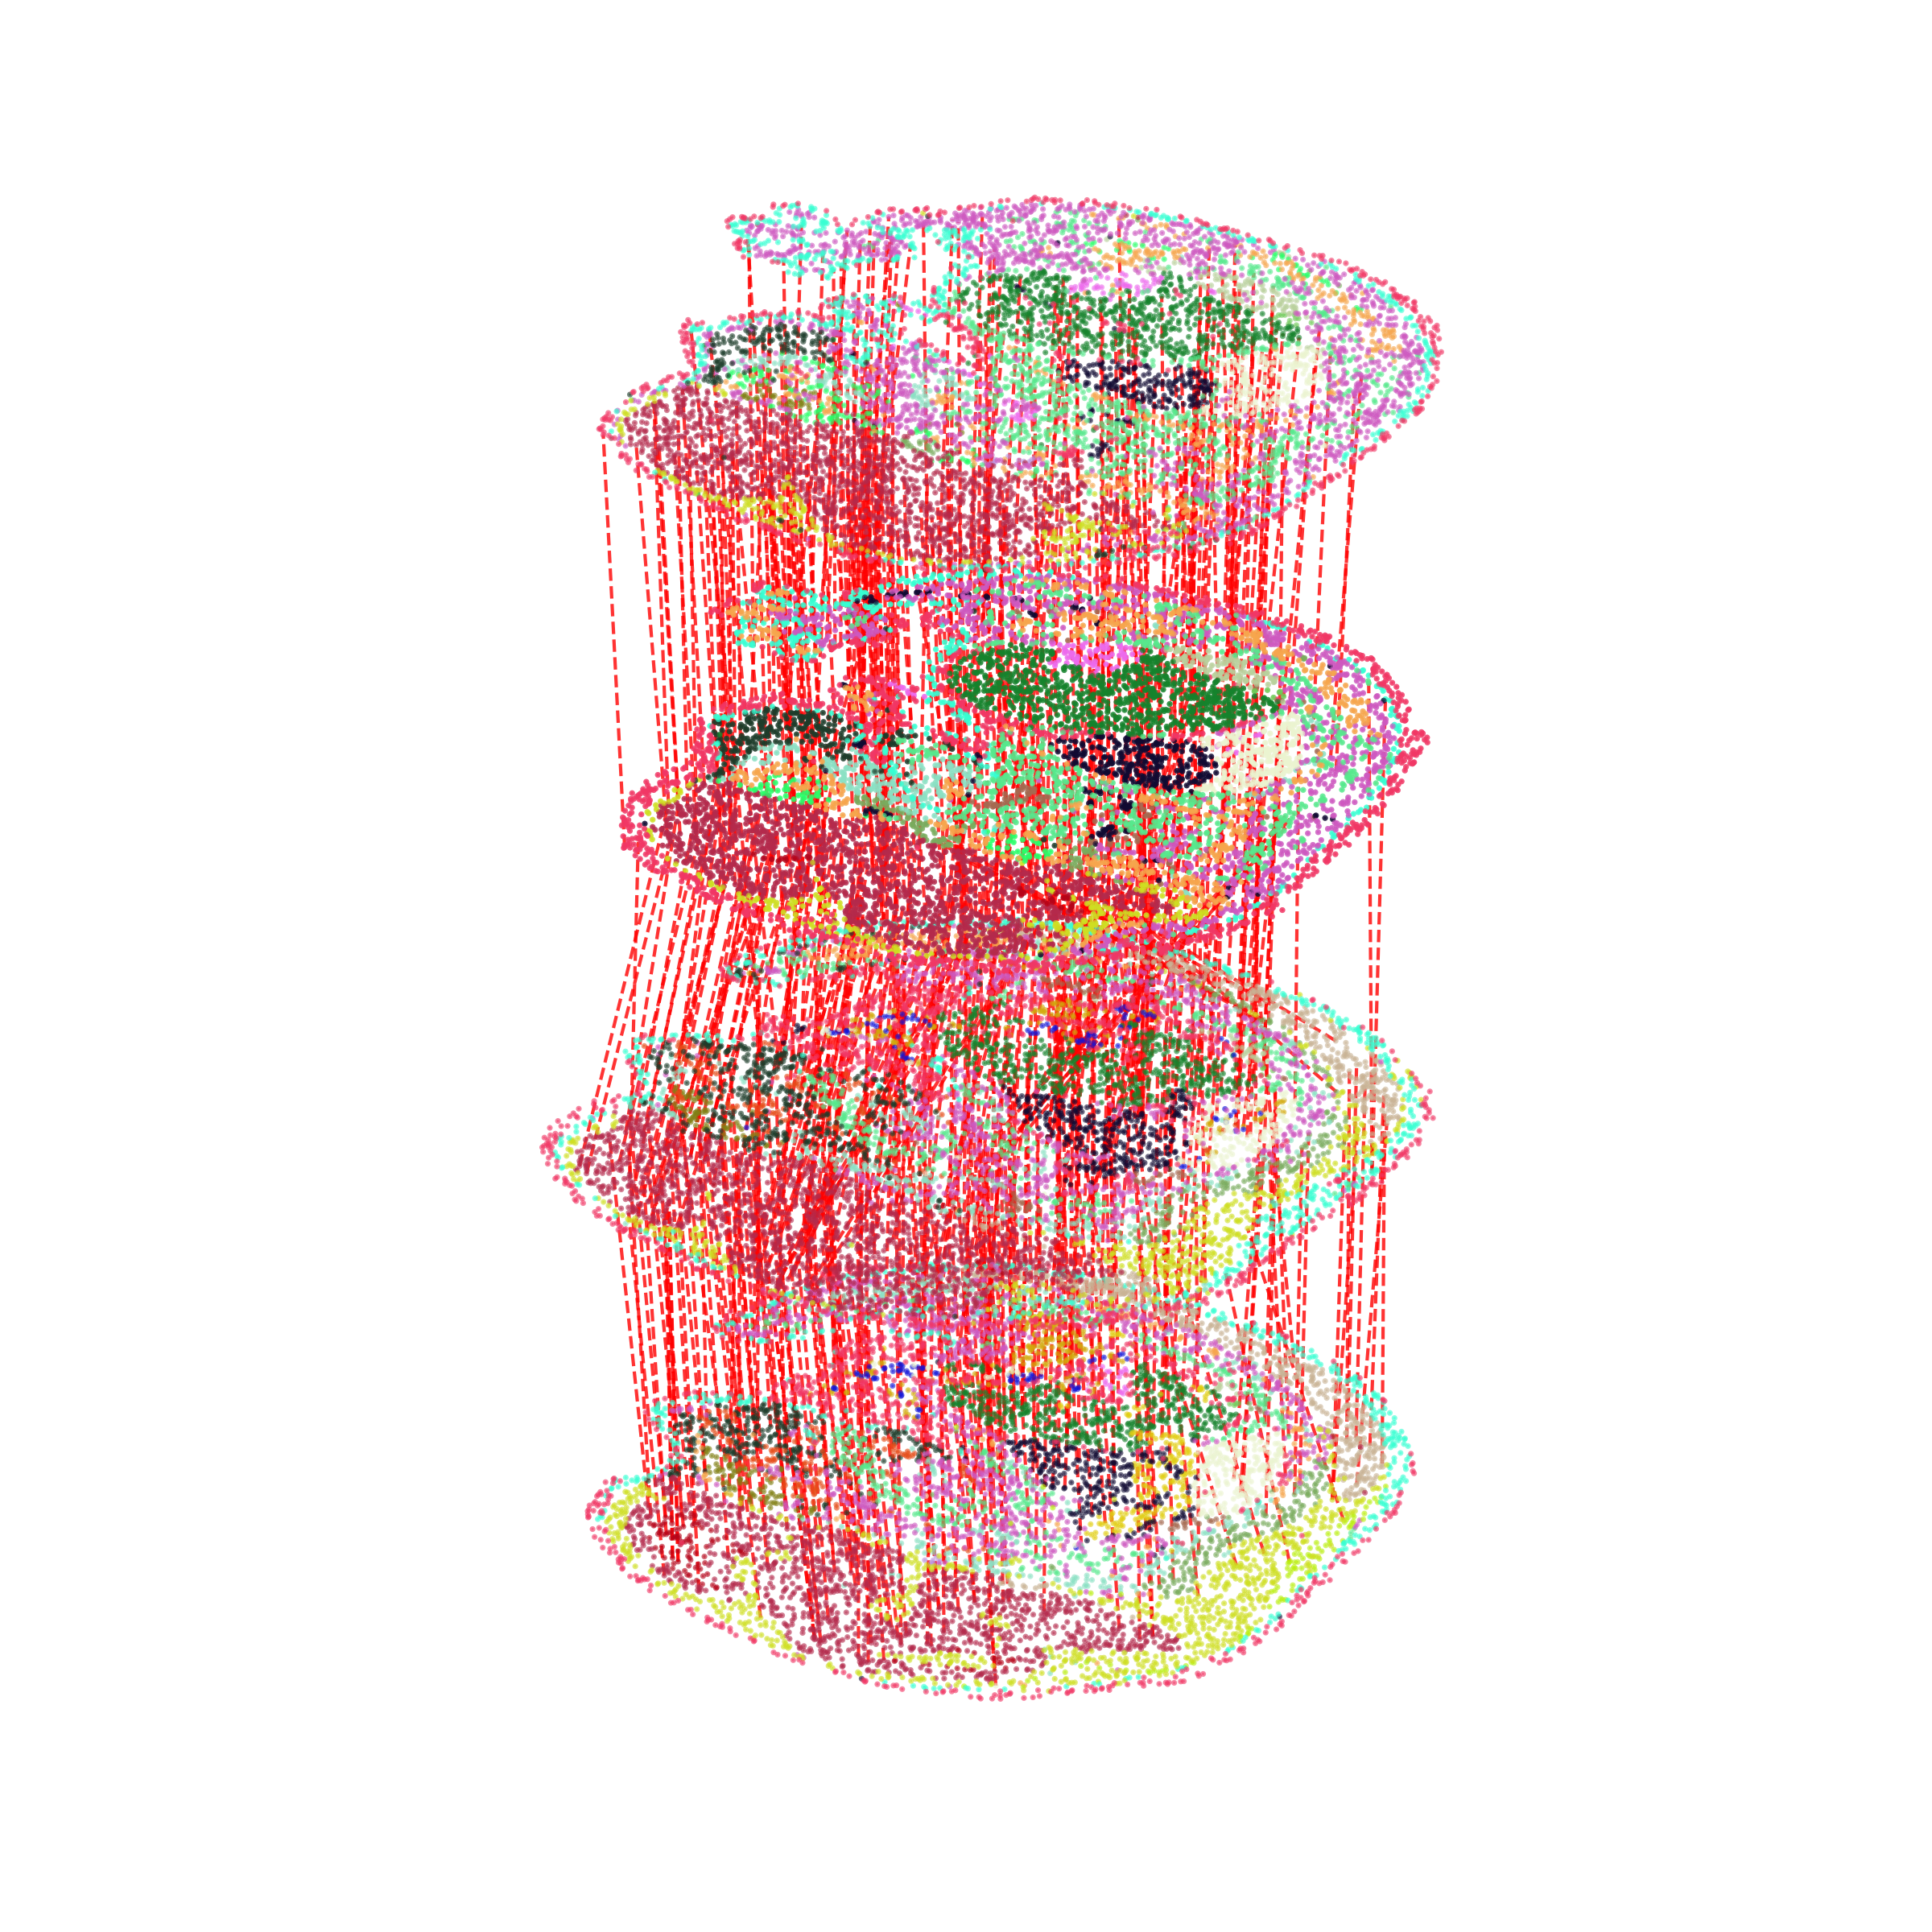

In [63]:
model = build_3D([adata1,adata2,adata3,adata4],matching_list,smooth=True,mapping_rank_list=index_list)
model.draw_3D(hide_axis=True,line_color='red',height=10,size=[10,20],line_width=1)